In [63]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
data=pd.read_csv('Churn.csv')
data 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# so here the dependent variable is Churn which we need to be predicted  

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# converting the TotalCharges from string to float

In [4]:
index = data[data['TotalCharges'] == " "]["TotalCharges"].index

In [5]:
for i in index:
    data.at[i, "TotalCharges"] = "0.0"

In [6]:
data["TotalCharges"] = data["TotalCharges"].astype(float)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### from the above we can conclude that the most of the feature are categorical data types  and need to encoded

#### checking for the null values in the data set 

In [8]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### from the above there is no null values in the dataset and i am also dropping the customerID because it is no more important for building the model

In [92]:
data1=data.drop(['customerID'],axis=1)
data1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## here i am finding the  no of unique values in the each feature

In [10]:
data1.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

# univariate analysis of the each feature 

#### here i am creating a function which takes feature and plot the countplot and a for loop to iterate over the features

In [11]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [12]:
def count_plot(df,feature):
    sns.countplot(df[feature])

In [13]:
list=[
"gender","SeniorCitizen","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod","Churn"]

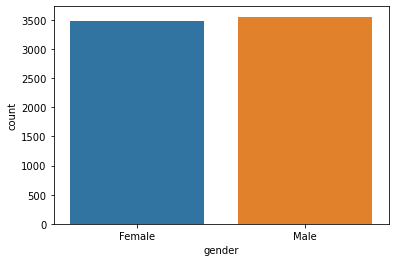

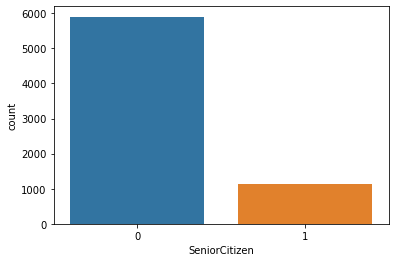

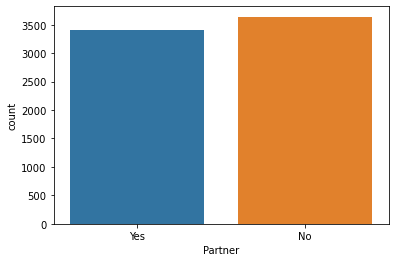

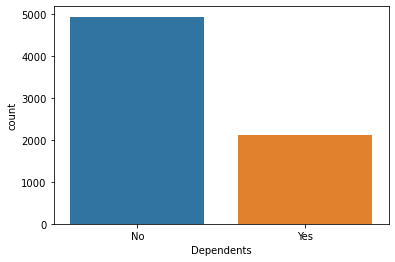

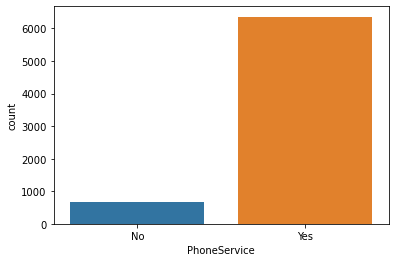

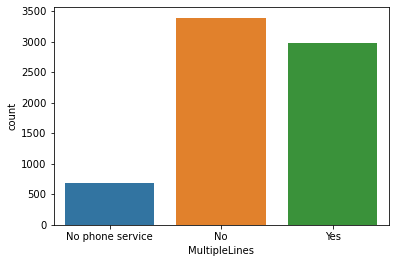

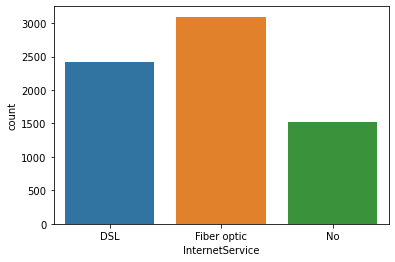

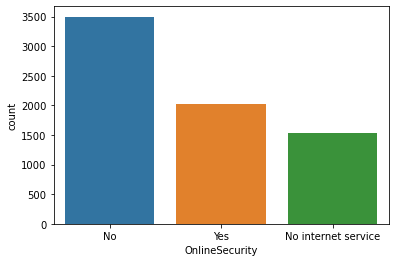

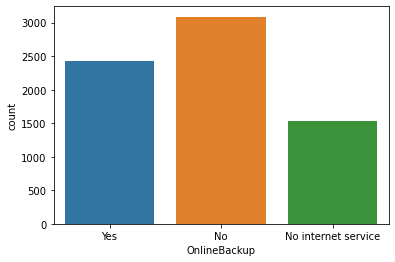

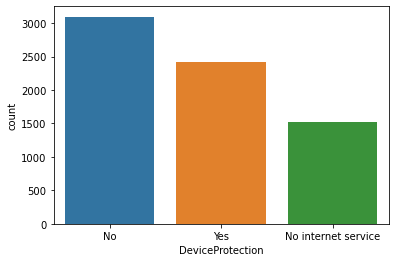

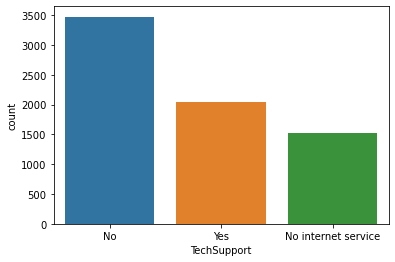

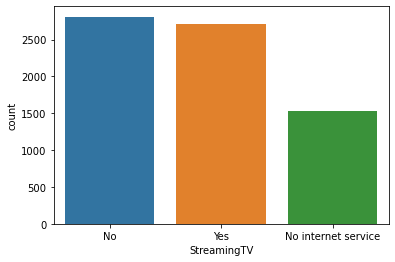

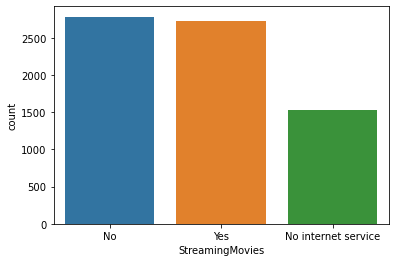

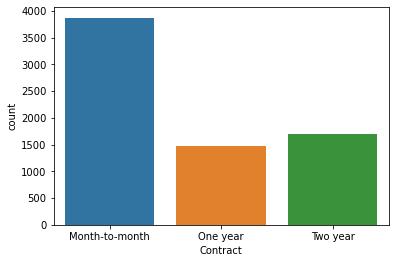

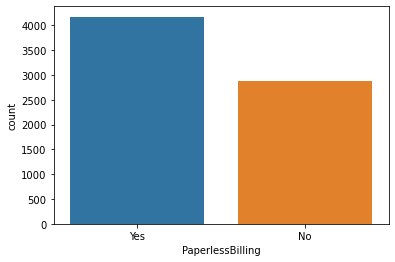

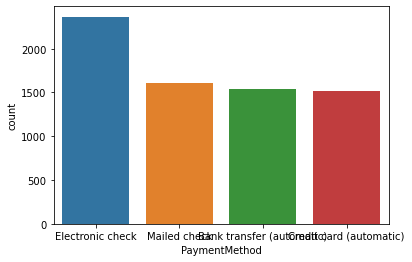

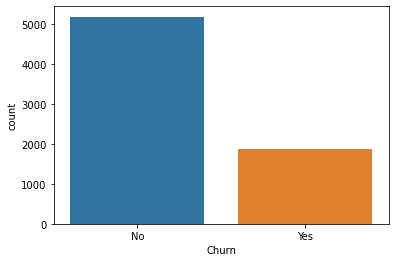

In [14]:
for i in list:
     plt.show(count_plot(data1,i))

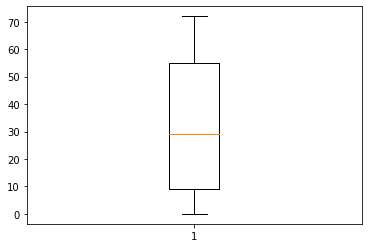

In [15]:
plt.show(plt.boxplot(data1.tenure))

In [16]:
data1.tenure.describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

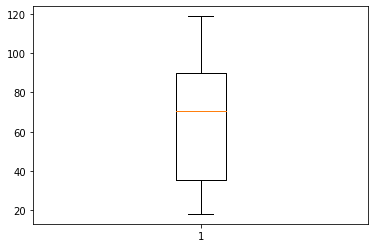

In [17]:
plt.show(plt.boxplot(data1.MonthlyCharges))

In [18]:
data1.MonthlyCharges.describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

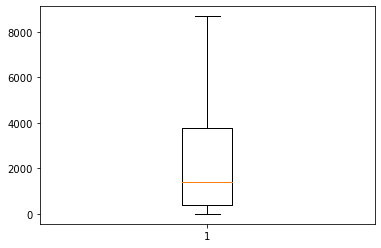

In [19]:
plt.show(plt.boxplot(data1.TotalCharges))

In [20]:
data1.TotalCharges.describe()

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

# Bivariate analysis of the features with respect to the churn

<AxesSubplot:xlabel='Churn', ylabel='count'>

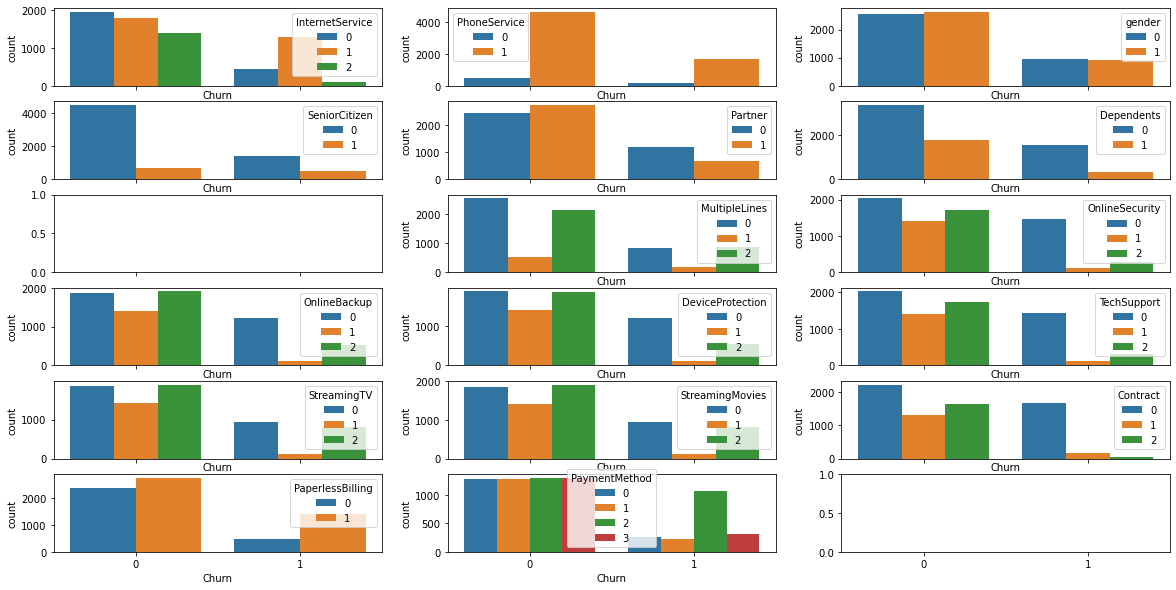

In [90]:
fig, axes = plt.subplots(6, 3, sharex=True, figsize=(20, 10))
sns.countplot(ax=axes[0,0], x="Churn", hue="InternetService", data=data1)
sns.countplot(ax=axes[0,1], x="Churn", hue="PhoneService", data=data1)
sns.countplot(ax=axes[0,2], x="Churn", hue="gender", data=data1)
sns.countplot(ax=axes[1,0], x="Churn", hue="SeniorCitizen", data=data1)
sns.countplot(ax=axes[1,1], x="Churn", hue="Partner", data=data1)
sns.countplot(ax=axes[1,2], x="Churn", hue="Dependents", data=data1)
sns.countplot(ax=axes[2,1], x="Churn", hue="MultipleLines", data=data1)
sns.countplot(ax=axes[2,2], x="Churn", hue="OnlineSecurity", data=data1)
sns.countplot(ax=axes[3,0], x="Churn", hue="OnlineBackup", data=data1)
sns.countplot(ax=axes[3,1], x="Churn", hue="DeviceProtection", data=data1)
sns.countplot(ax=axes[3,2], x="Churn", hue="TechSupport", data=data1)
sns.countplot(ax=axes[4,0], x="Churn", hue="StreamingTV", data=data1)
sns.countplot(ax=axes[4,1], x="Churn", hue="StreamingMovies", data=data1)
sns.countplot(ax=axes[4,2], x="Churn", hue="Contract", data=data1)
sns.countplot(ax=axes[5,0], x="Churn", hue="PaperlessBilling", data=data1)
sns.countplot(ax=axes[5,1], x="Churn", hue="PaymentMethod", data=data1)

# Peforming the preprocessing on the categorical data types

In [94]:
data1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [22]:
scale=preprocessing.LabelEncoder()

In [23]:
list=['gender', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']

In [24]:
for i in list:
    data1[i]=scale.fit_transform(data1[i])  

In [91]:
data1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


# performing the normalization on the dataset for the features  tenure,MonthlyCharges,TotalCharges

In [26]:
data_norm=data1.iloc[:,[4,-3,-2]]
data_norm

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


In [27]:
data2=data1.drop(['tenure','MonthlyCharges','TotalCharges'],axis=1)
data2

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,2,0,2,0,2,2,2,2,1,1,3,0
7039,0,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,0
7040,0,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,0
7041,1,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,1


In [28]:
scale2=preprocessing.MinMaxScaler()
data_norm=pd.DataFrame(scale2.fit_transform(data_norm),columns=['tenure','MonthlyCharges','TotalCharges'])

In [29]:
final_data=pd.concat([data_norm,data2],axis=1)
final_data

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0.013889,0.115423,0.003437,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,0.472222,0.385075,0.217564,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,0.027778,0.354229,0.012453,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,0.625000,0.239303,0.211951,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0.027778,0.521891,0.017462,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.333333,0.662189,0.229194,1,0,1,1,1,2,0,2,0,2,2,2,2,1,1,3,0
7039,1.000000,0.845274,0.847792,0,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,0
7040,0.152778,0.112935,0.039892,0,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,0
7041,0.055556,0.558706,0.035303,1,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,1


# Splitting the data set 

### Dividing the data set into the test and train as per the problem statement train=4000 and test=3043 for this we take 0.44% as the test size

In [30]:
x=final_data.iloc[:,0:-1]
x

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0.013889,0.115423,0.003437,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2
1,0.472222,0.385075,0.217564,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3
2,0.027778,0.354229,0.012453,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3
3,0.625000,0.239303,0.211951,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0
4,0.027778,0.521891,0.017462,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.333333,0.662189,0.229194,1,0,1,1,1,2,0,2,0,2,2,2,2,1,1,3
7039,1.000000,0.845274,0.847792,0,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1
7040,0.152778,0.112935,0.039892,0,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2
7041,0.055556,0.558706,0.035303,1,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3


In [31]:
y=final_data.iloc[:,-1]
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.43,random_state=42)

In [33]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4014, 19), (3029, 19), (4014,), (3029,))

# model building using Logistic Regression

In [34]:
model1=LogisticRegression()

In [35]:
model1.fit(x_train,y_train)

LogisticRegression()

In [36]:
predict_logistic=model1.predict(x_test)

In [37]:
accuracy_logistic=accuracy_score(y_test,predict_logistic)
accuracy_logistic

0.8141300759326511

In [38]:
confusion_matrix(y_test,predict_logistic)

array([[1999,  221],
       [ 342,  467]], dtype=int64)

In [39]:
print(classification_report(y_test,predict_logistic))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      2220
           1       0.68      0.58      0.62       809

    accuracy                           0.81      3029
   macro avg       0.77      0.74      0.75      3029
weighted avg       0.81      0.81      0.81      3029



In [42]:
roc_score_logistic=roc_auc_score(y_test,predict_logistic)
roc_score_logistic

0.7388531609483402

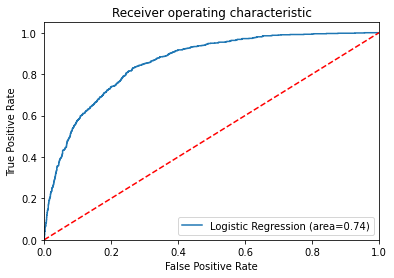

In [45]:
fpr, tpr, thresholds = roc_curve(y_test,model1.predict_proba(x_test)[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% roc_score_logistic)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show() 

### since the decision tree and ensembling techniques are not senstive to the outliers so i am using normal data for analysis

In [68]:
x1=data1.iloc[:,0:-1]
x1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


In [69]:
y1=data1.iloc[:,-1]
y1

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

In [70]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.43,random_state=42)

# model building using Decision Tree and hyperparameter tuning using Gridsearch cv

In [71]:
model_test=DecisionTreeClassifier()
param_grid = [{'criterion':['gini','entropy'],'splitter':["best", "random"],'max_depth':[3,4,5,6,7,10] }]
gsv = GridSearchCV(model_test,param_grid,cv=10)
gsv.fit(x1_train,y1_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [3, 4, 5, 6, 7, 10],
                          'splitter': ['best', 'random']}])

In [72]:
gsv.best_params_ , gsv.best_score_ 

({'criterion': 'entropy', 'max_depth': 5, 'splitter': 'best'},
 0.7847607349784742)

In [73]:
model2=DecisionTreeClassifier(criterion="entropy",max_depth=5,splitter='best')

In [74]:
model2.fit(x1_train,y1_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [75]:
predict_decision_tree=model2.predict(x1_test)

In [76]:
accuracy_decision_tree=accuracy_score(y1_test,predict_decision_tree)
accuracy_decision_tree

0.7956421261142291

# model building using Random Forest

In [77]:
num_trees = 100
max_features = 5
kfold = KFold(n_splits=10, random_state=42)
model_Randomforest = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)

In [78]:
model_Randomforest.fit(x1_train,y1_train)

RandomForestClassifier(max_features=5)

In [79]:
predict_Randomforest=model_Randomforest.predict(x1_test)

In [80]:
accuracy_Randomforest=accuracy_score(y1_test,predict_Randomforest)
accuracy_Randomforest

0.7903598547375371

# model building using XG Boost

In [81]:
model_XGboost=XGBClassifier()
model_XGboost.fit(x1_train,y1_train)

C:\Users\ELCOT\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:33:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [82]:
predict_xgboost=model_XGboost.predict(x1_test)

In [83]:
accuracy_xgboost=accuracy_score(y1_test,predict_xgboost)
accuracy_xgboost

0.7900297127764939

In [86]:
comparision= {"MODEL":pd.Series(["logistic","Decision_tree","RandomForest","XGboost"]),"Accuracy":pd.Series([accuracy_logistic,accuracy_decision_tree,accuracy_Randomforest,accuracy_xgboost])}
table=pd.DataFrame(comparision)
table.sort_values(['Accuracy'],ascending=False)

,MODEL,Accuracy
0,logistic,0.814130
1,Decision_tree,0.795642
2,RandomForest,0.790360
3,XGboost,0.790030


# from above models the logistic regression gives the best accuracy when compared to the other models 